### Run the notebook and it will produce all the figures in simulation part

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.ticker as mtick
import numpy as np
from time import time
import math
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


from sklearn.model_selection import GridSearchCV
from KNN import KNN
from AWNN import AWNN 
from AKDE import AKDE
from sklearn.neighbors import KernelDensity

from AWNN import weight_selection
import numpy as np
from sklearn.neighbors import KDTree

from synthetic_distributions import TestDistribution

from sklearn.neighbors import KDTree


## Illustration of Necessity of Adaptivity

(-3.5, 3.0)

(-3.5, 3.0)

(-0.04999999983717682, 0.9634272031405825)

(-0.04999999983717682, 0.9634272031405825)

Text(0.5, 0, 'x')

Text(0.5, 0, 'x')

Text(0, 0.5, 'Density')

Text(0, 0.5, 'Density')

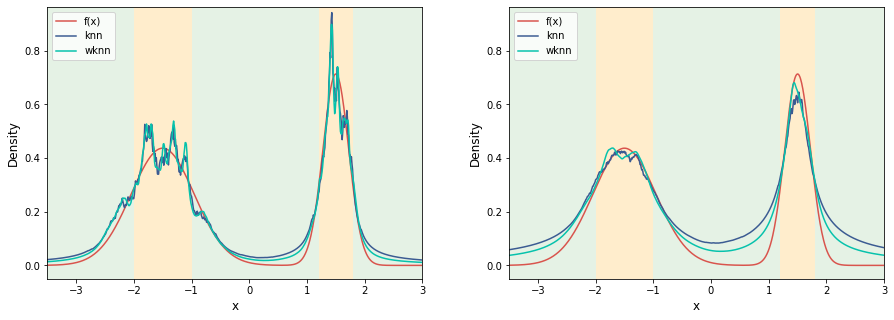

In [62]:

df1 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])
df2 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])




# setting s
dim=1
n_train=1000
n_test=1000
distribution=2
np.random.seed(3)


# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
range_l,range_u=-3.5,3
X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)




## first k
# fit model 
k1=50
modelKNN=KNN(k=k1)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k1)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df1["x"]=X_test.ravel()
df1["f(x)"]=pdf_X_test
df1["knn"]=pdf_KNN
df1["wknn"]=pdf_WKNN
df1["k"]=k1

## second k
# fit model 
k2=200
modelKNN=KNN(k=k2)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k2)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df2["x"]=X_test.ravel()
df2["f(x)"]=pdf_X_test
df2["knn"]=pdf_KNN
df2["wknn"]=pdf_WKNN
df2["k"]=k2

# generate screen
fig = plt.figure(figsize=(15,5))
ax=[]
ax.append(plt.subplot2grid((1,15), (0, 0), colspan=7))
ax.append(plt.subplot2grid((1,15), (0, 8), colspan=7))
plt.subplots_adjust(wspace=1,hspace=0.5)


# set back ground
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
ax[0].add_patch(rectangle)

#ax[0].axhline(0.3,lw=1,color="black",linestyle='--')

rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
ax[1].add_patch(rectangle)

#ax[1].axhline(0.3,lw=1,color="black",linestyle='--')


# plot lines
line1, = ax[0].plot(df1["x"], df1['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax[0].plot(df1["x"], df1['knn'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'knn')
line3, = ax[0].plot(df1["x"], df1['wknn'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'wknn')
line4, = ax[1].plot(df1["x"], df2['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line5, = ax[1].plot(df1["x"], df2['knn'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'knn')
line6, = ax[1].plot(df1["x"], df2['wknn'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'wknn')
# set axis x
ax[0].set_xlim([range_l,range_u])
ax[1].set_xlim([range_l,range_u])

# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
ax[0].set_ylim(interval_l-0.05,interval_u+0.35*(interval_u-interval_l))

ax[1].set_ylim(interval_l-0.05,interval_u+0.35*(interval_u-interval_l))

# set text
ax[1].set_xlabel("x",fontsize = 12)
ax[0].set_xlabel("x",fontsize = 12)
ax[0].set_ylabel("Density",fontsize = 12)
ax[1].set_ylabel("Density",fontsize = 12)



ax[1].legend(handles = [line1,line2,line3],loc="upper left")
ax[0].legend(handles = [line1,line2,line3],loc="upper left")


plt.savefig("./plot_result/illustration.pdf",bbox_inches="tight")




## Illustration of Adaptivity of Optimization Problem

In [27]:
dim=1
n_train=1000
n_test=1000
distribution=2
np.random.seed(3)
C=1

# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.array([[-1.5],[0.5],[1.5]])
pdf_X_test=density.density(X_test)

tree = KDTree(X_train)
distance_matrix,_=tree.query(X_test,n_train)
weight_matrix=[weight_selection(C*distance_matrix[i],1)[0] for i in range(3)]

In [28]:
weight_matrix

[array([0.01624916, 0.01617101, 0.01615854, 0.01611654, 0.01611494,
        0.01608787, 0.01598188, 0.01584699, 0.01565953, 0.01554194,
        0.01553274, 0.01543297, 0.01539968, 0.01506592, 0.01495699,
        0.01493877, 0.01490228, 0.01483755, 0.0147584 , 0.01466794,
        0.01462796, 0.01400747, 0.01396613, 0.01394907, 0.01330524,
        0.01330221, 0.01323945, 0.01322822, 0.01317177, 0.01300039,
        0.01299211, 0.01286264, 0.01266386, 0.01241631, 0.01209646,
        0.01207915, 0.01141525, 0.01128667, 0.01105857, 0.01098634,
        0.01092395, 0.0107636 , 0.01062518, 0.01054417, 0.01051695,
        0.01031835, 0.00986812, 0.00983734, 0.00980855, 0.00978558,
        0.00955516, 0.00942381, 0.00930383, 0.00925294, 0.00911112,
        0.00903643, 0.00902525, 0.00852353, 0.00839111, 0.00835802,
        0.00821305, 0.00779591, 0.00778403, 0.00767877, 0.00753695,
        0.00746921, 0.00728574, 0.00700752, 0.00676706, 0.00669698,
        0.0066207 , 0.00660271, 0.00644375, 0.00

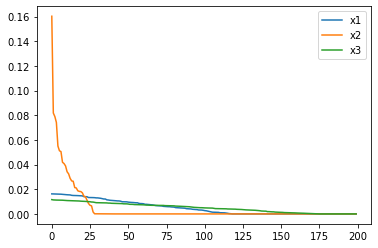

In [30]:
plt.plot(weight_matrix[0][:200],label="x1")
plt.plot(weight_matrix[1][:200],label="x2")
plt.plot(weight_matrix[2][:200],label="x3")

plt.legend()

## Parameter Analysis

In [63]:
# initialize data frame
df = pd.DataFrame(columns=["C","L2","mae","mse","d"])

# setting and sampling
dim=2
n_train=1000
n_test=2000
distribution=4
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()

X_train, pdf_X_train = density.generate(n_train)
X_test, pdf_X_test = density.generate(n_test)


# metric function 
def mae(x,y):
    return np.abs(x-y).mean()
def mse(x,y):
    return ((x-y)**2).mean()




# range for parameter 
range_l,range_u=0.01,1.5

for C in np.arange(range_l,range_u,0.075):
    # training and estimate integral
    modelAWNN=AWNN(C=C).fit(X_train)
    L2_statistic=-modelAWNN.score(X_test)
    estDensity=np.exp(modelAWNN.log_density)
    df=df.append({"C":C,"L2":L2_statistic,
                                  "mse":mse(estDensity,pdf_X_test),
                                 "mae":mae(estDensity,pdf_X_test),"d":dim},ignore_index=True)
    
   



0.5302606310190175
1.755391619430734
0.6964948544578778
2.014043072612599
0.89378090031821
2.2823082740088267
1.002687905001012
2.415789873673128
1.0699971123654795
2.4932620062516624
1.1160571955679965
2.5443940154549427
1.1501800689518598
2.5812295353921932
1.1771037062422087
2.6097297272547246
1.1992514202931384
2.6327365662936972
1.21803008713281
2.651925709512547
1.2343029923290683
2.668415093407331
1.248733098405441
2.682886642253702
1.2617714460509306
2.6958282254371553
1.2736683131556839
2.7075352946889533
1.2846974150008204
2.7182113161532593
1.2950250477010052
2.728077777722023
1.3047094080590032
2.737224496528148
1.3138600236360285
2.7457350884988463
1.3225302012891333
2.7537445539914507
1.3307091767123838
2.7613818889835526


(0.01, 1.5)

(-1.4446046716200884, -1.2146798606398892)

(0.10201667416628447, 0.5960319111820896)

Text(0.5, 0, 'C')

Text(0, 0.5, 'L2')

Text(0, 0.5, 'MAE')

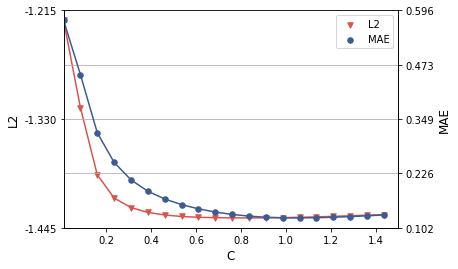

In [64]:
# first line    
fig, ax1 = plt.subplots()
line1, = ax1.plot(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'L2')
p1 = ax1.scatter(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],marker = 'v',s = 30,label = 'L2')
# second line
ax2 = ax1.twinx()
line2, = ax2.plot(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'MAE')
p2 = ax2.scatter(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],marker = 'o',s = 30,label = 'MAE')

# axis setting
ax1.set_xlim([range_l,range_u])
interval_l,interval_u=df["L2"].to_numpy().min(),df["L2"].to_numpy().max()
ax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

interval_l,interval_u=df["mae"].to_numpy().min(),df["mae"].to_numpy().max()
ax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

ax1.set_xlabel("C",fontsize = 12)
ax1.set_ylabel("L2",fontsize = 12)
ax2.set_ylabel("MAE",fontsize = 12)

ax1.yaxis.set_major_locator(LinearLocator(3)) 
ax2.yaxis.set_major_locator(LinearLocator(5)) 
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
# set legend and grid
plt.legend(handles = [p1,p2])
plt.grid(axis='y')
plt.savefig("./plot_result/parameter_analysis_dimension_{}.pdf".format(dim),bbox_inches="tight")



In [65]:
# initialize data frame
df = pd.DataFrame(columns=["C","L2","mae","mse","d"])

# setting and sampling
dim=5
n_train=1000
n_test=2000
distribution=4
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()

X_train, pdf_X_train = density.generate(n_train)
X_test, pdf_X_test = density.generate(n_test)


# metric function 
def mae(x,y):
    return np.abs(x-y).mean()
def mse(x,y):
    return ((x-y)**2).mean()




# range for parameter 
range_l,range_u=0.5,2.5

for C in np.arange(range_l,range_u,0.1):
    # training and estimate integral
    modelAWNN=AWNN(C=C).fit(X_train)
    L2_statistic=-modelAWNN.score(X_test)
    estDensity=np.exp(modelAWNN.log_density)
    df=df.append({"C":C,"L2":L2_statistic,
                                  "mse":mse(estDensity,pdf_X_test),
                                 "mae":mae(estDensity,pdf_X_test),"d":dim},ignore_index=True)
    
  


0.8580069602251762
3.0350782109378844
0.9583071889073399
3.202021407419644
1.046566831818725
3.3394672422201093
1.1260912982328162
3.4563308475523438
1.1993075535575488
3.558434881309594
1.267616252671094
3.6493749388297783
1.3320375028417701
3.73159087309815
1.3935818321665379
3.8069570888411377
1.453196119264318
3.876482511053757
1.5114513810266959
3.9416611412052833
1.5689616602832
4.002684560693705
1.6261827911544342
4.060848753986941
1.6831161770667804
4.116704825261243
1.7396860080518979
4.1707299249147125
1.7962313013635411
4.2233119924731435
1.8530065432312741
4.275139644780895
1.9100809889322092
4.326974272650092
1.9676399147032775
4.378608366338503
2.0257084939692036
4.430223754606269
2.084429317005693
4.481024703740717


(0.5, 2.5)

(-2.4475456984384967, -2.1641915151067184)

(0.5853571322459503, 1.0525902952864175)

Text(0.5, 0, 'C')

Text(0, 0.5, 'L2')

Text(0, 0.5, 'MAE')

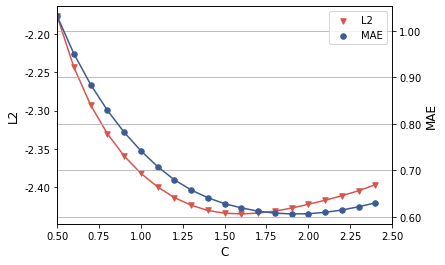

In [66]:
 
# first line    
fig, ax1 = plt.subplots()
line1, = ax1.plot(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'L2')
p1 = ax1.scatter(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],marker = 'v',s = 30,label = 'L2')
# second line
ax2 = ax1.twinx()
line2, = ax2.plot(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'MAE')
p2 = ax2.scatter(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],marker = 'o',s = 30,label = 'MAE')

# axis setting
ax1.set_xlim([range_l,range_u])
interval_l,interval_u=df["L2"].to_numpy().min(),df["L2"].to_numpy().max()
ax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

interval_l,interval_u=df["mae"].to_numpy().min(),df["mae"].to_numpy().max()
ax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

ax1.set_xlabel("C",fontsize = 12)
ax1.set_ylabel("L2",fontsize = 12)
ax2.set_ylabel("MAE",fontsize = 12)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# set legend and grid
plt.legend(handles = [p1,p2])
plt.grid(axis='y')
plt.savefig("./plot_result/parameter_analysis_dimension_{}.pdf".format(dim),bbox_inches="tight")



In [67]:
# initialize data frame
df = pd.DataFrame(columns=["C","L2","mae","mse","d"])

# setting and sampling
dim=8
n_train=1000
n_test=2000
distribution=4
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()

X_train, pdf_X_train = density.generate(n_train)
X_test, pdf_X_test = density.generate(n_test)


# metric function 
def mae(x,y):
    return np.abs(x-y).mean()
def mse(x,y):
    return ((x-y)**2).mean()

# sampling for integration estimation
def grid_training(X,nsample=0):
    dim=X.shape[1]
    potentialNeighbors=X.shape[0]
    if nsample==0:
        nsample=potentialNeighbors*dim**2
    lower=np.array([np.quantile(X[:,i],0.01) for i in range(dim)])
    upper=np.array([np.quantile(X[:,i],1-0.01) for i in range(dim)])
        

    return np.random.rand(int(nsample),dim)*(upper-lower)+lower,np.prod(upper-lower)



X_validate,mass=grid_training(X_train,n_train*dim**2)



# range for parameter 
range_l,range_u=1.5,3.5

for C in np.arange(range_l,range_u,0.1):
    # training and estimate integral
    modelAWNN=AWNN(C=C).fit(X_train)
    L2_statistic=-modelAWNN.score(X_test)
    estDensity=np.exp(modelAWNN.log_density)
    df=df.append({"C":C,"L2":L2_statistic,
                                  "mse":mse(estDensity,pdf_X_test),
                                 "mae":mae(estDensity,pdf_X_test),"d":dim},ignore_index=True)
    
 


1.099994607861026
4.560791004901088
1.1670404622421586
4.6832902987671
1.2347808490224352
4.802621545926821
1.30395812985041
4.9196459277862985
1.375161695560709
5.035279104532997
1.4486915146535635
5.149211523615419
1.5259094719917103
5.26222763074987
1.6061485977163705
5.375716305164086
1.6892037069087313
5.490678740584401
1.776364654220956
5.603919491995983
1.8681750839021893
5.716309503390323
1.9643981166584958
5.83114274084717
2.0653981888863253
5.9458499598160905
2.1748333665304056
6.059329901824785
2.2920318667014494
6.16729141289633
2.4142040270488887
6.276132598968208
2.5384900042043617
6.389537293164765
2.673006817477036
6.505920294423244
2.805995036124821
6.623246925604073
2.953145053105491
6.740746069641728


(1.5, 3.5)

(-3.9056815422070947, -3.4396113901273457)

(1.776530755009157, 2.247020692378405)

Text(0.5, 0, 'C')

Text(0, 0.5, 'L2')

Text(0, 0.5, 'MAE')

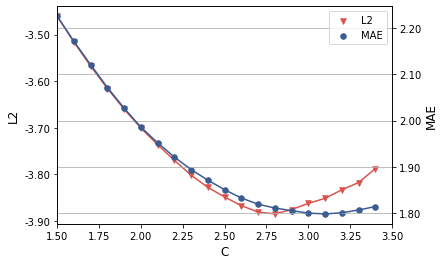

In [68]:
  
# first line    
fig, ax1 = plt.subplots()
line1, = ax1.plot(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'L2')
p1 = ax1.scatter(df["C"], df['L2'],color = sns.xkcd_rgb["pale red"],marker = 'v',s = 30,label = 'L2')
# second line
ax2 = ax1.twinx()
line2, = ax2.plot(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'MAE')
p2 = ax2.scatter(df["C"], df['mae'],color = sns.xkcd_rgb["denim blue"],marker = 'o',s = 30,label = 'MAE')

# axis setting
ax1.set_xlim([range_l,range_u])
interval_l,interval_u=df["L2"].to_numpy().min(),df["L2"].to_numpy().max()
ax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

interval_l,interval_u=df["mae"].to_numpy().min(),df["mae"].to_numpy().max()
ax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

ax1.set_xlabel("C",fontsize = 12)
ax1.set_ylabel("L2",fontsize = 12)
ax2.set_ylabel("MAE",fontsize = 12)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# set legend and grid
plt.legend(handles = [p1,p2])
plt.grid(axis='y')
plt.savefig("./plot_result/parameter_analysis_dimension_{}.pdf".format(dim),bbox_inches="tight")



## Adaptivity Analysis

(-3.0, 3.0)

(-3.0, 3.0)

(-0.03568248883635309, 0.7493322691455249)

(-4.25, 111.25)

Text(0.5, 0, 'x')

Text(0, 0.5, 'Density')

Text(0, 0.5, 'k(x)')

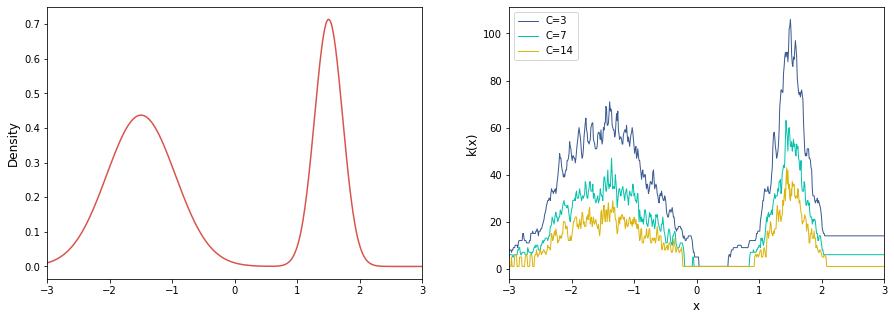

In [69]:
# produce the data frames for different C
df1 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C"])
df2 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C"])
df3 = pd.DataFrame(columns=["x","f(x)","k(x)","distribution","C"])



# setting s
dim=1
n_train=1000
n_test=1000
distribution=2
np.random.seed(1)


# generate data
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
range_l,range_u=-3,3
X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

# train with different C
C=(3,7,14)


## first C 
# fit model 
modelAWNN=AWNN(C=C[0])
_=modelAWNN.fit(X_train)
_=modelAWNN.predict(X_test)
# change frame
df1["x"]=X_test.ravel()
df1["f(x)"]=pdf_X_test
df1["k(x)"]=(modelAWNN.estAlpha>0).sum(axis=1)
df1["distribution"]=distribution
df1["C"]=C[0]

## second C 
# fit model 
modelAWNN=AWNN(C=C[1])
_=modelAWNN.fit(X_train)
_=modelAWNN.predict(X_test)
# change frame
df2["x"]=X_test.ravel()
df2["f(x)"]=pdf_X_test
df2["k(x)"]=(modelAWNN.estAlpha>0).sum(axis=1)
df2["distribution"]=distribution
df2["C"]=C[1]

## third C 
# fit model 
modelAWNN=AWNN(C=C[2])
_=modelAWNN.fit(X_train)
_=modelAWNN.predict(X_test)
# change frame
df3["x"]=X_test.ravel()
df3["f(x)"]=pdf_X_test
df3["k(x)"]=(modelAWNN.estAlpha>0).sum(axis=1)
df3["distribution"]=distribution
df3["C"]=C[2]

# generate screen
fig = plt.figure(figsize=(15,5))
ax=[]
ax.append(plt.subplot2grid((1,15), (0, 0), colspan=7))
ax.append(plt.subplot2grid((1,15), (0, 8), colspan=7))
plt.subplots_adjust(wspace=1,hspace=0.5)


# plot lines
line1, = ax[0].plot(df1["x"], df1['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax[1].plot(df1["x"], df1['k(x)'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',linewidth=1,label = 'C={}'.format(C[0]))
line3, = ax[1].plot(df2["x"], df2['k(x)'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',linewidth=1,label = 'C={}'.format(C[1]))
line4, = ax[1].plot(df3["x"], df3['k(x)'],color = sns.xkcd_rgb["gold"],linestyle = '-',linewidth=1,label = 'C={}'.format(C[2]))

# set axis x
ax[0].set_xlim([range_l,range_u])
ax[1].set_xlim([range_l,range_u])

# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
ax[0].set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))
interval_l,interval_u=df3["k(x)"].to_numpy().min(),df1["k(x)"].to_numpy().max()
ax[1].set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

# set text
ax[1].set_xlabel("x",fontsize = 12)
ax[0].set_ylabel("Density",fontsize = 12)
ax[1].set_ylabel("k(x)",fontsize = 12)



plt.legend(handles = [line2,line3,line4],loc="upper left")


plt.savefig("./plot_result/adaptivity_analysis_{}.pdf".format(distribution),bbox_inches="tight")




## Smoothness Analysis 

In [71]:
# setting and sampling
dim=2
n_train=1000
n_test=100 # 100*100
distribution=17
np.random.seed(2)
interval_l,interval_u=-3.5,3.5

density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test_1=np.linspace(interval_l,interval_u,n_test)
X_test_2=np.linspace(interval_l,interval_u,n_test)
axis1,axis2=np.meshgrid(X_test_1,X_test_2)
X_test=np.array([axis1.ravel(),axis2.ravel()]).T
pdf_X_test=density.density(X_test).reshape(-1,n_test)

## produce estimation
# AWNN
model_AWNN=AWNN(C=.1).fit(X_train)
est_AWNN=np.exp(model_AWNN.predict(X_test).reshape(-1,n_test))
# KNN
model_KNN=KNN(k=40).fit(X_train,method="KNN")
est_KNN=np.exp(model_KNN.predict(X_test).reshape(-1,n_test))
# WKNN
model_WKNN=KNN(k=40).fit(X_train,method="WKNN")
est_WKNN=np.exp(model_WKNN.predict(X_test).reshape(-1,n_test))







(-3.5, 3.5)

(-3.5, 3.5)

(0.0, 0.21)

Text(0.5, 0, 'x')

Text(0.5, 0, 'y')

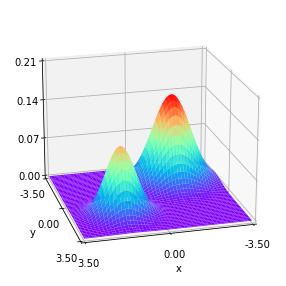

In [84]:
## poplation 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, pdf_X_test, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
plt.xlabel("x")
plt.ylabel("y")


# view 
ax.view_init(elev=20,azim=75)

plt.savefig("./plot_result/smooth_population.pdf",bbox_inches="tight")
plt.show()

(-3.5, 3.5)

(-3.5, 3.5)

(0.0, 0.21)

Text(0.5, 0, 'x')

Text(0.5, 0, 'y')

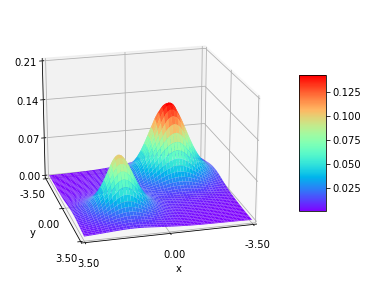

In [83]:
## AWNN 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, est_AWNN, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
plt.xlabel("x")
plt.ylabel("y")
fig.colorbar(surf, shrink=.5, aspect=5)

# view 
ax.view_init(elev=20,azim=75)

plt.savefig("./plot_result/smooth_AWNN.pdf",bbox_inches="tight")


(-3.5, 3.5)

(-3.5, 3.5)

(0.0, 0.21)

Text(0.5, 0, 'x')

Text(0.5, 0, 'y')

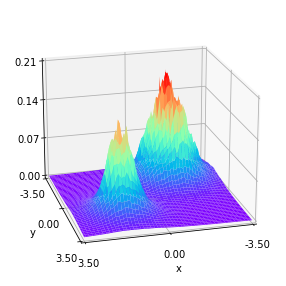

In [82]:
## KNN 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, est_KNN, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
plt.xlabel("x")
plt.ylabel("y")


# view 
ax.view_init(elev=20,azim=75)

plt.savefig("./plot_result/smooth_KNN.pdf",bbox_inches="tight")
plt.show()

(-3.5, 3.5)

(-3.5, 3.5)

(0.0, 0.21)

Text(0.5, 0, 'x')

Text(0.5, 0, 'y')

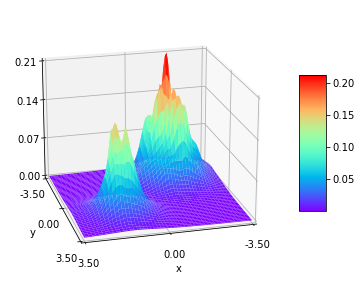

In [81]:
## WKNN 
# creat surface
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111,projection = '3d')
surf=ax.plot_surface(axis1, axis2, est_WKNN, cmap=plt.get_cmap('rainbow'),alpha=1)
# set axis and text 
ax.set_xlim(interval_l,interval_u)
ax.xaxis.set_major_locator(LinearLocator(3)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
ax.set_ylim(interval_l,interval_u)
ax.yaxis.set_major_locator(LinearLocator(3)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
ax.set_zlim(0,0.21)
ax.zaxis.set_major_locator(LinearLocator(4)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 
plt.xlabel("x")
plt.ylabel("y")
fig.colorbar(surf, shrink=.5, aspect=5)

# view 
ax.view_init(elev=20,azim=75)

plt.savefig("./plot_result/smooth_WKNN.pdf",bbox_inches="tight")
plt.show()

## Impact of C on Smoothness

Text(0.5, 0, 'x')

Text(0, 0.5, 'density')

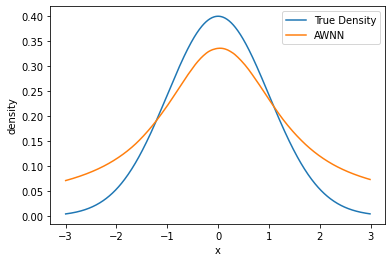

In [175]:
# settings and sampling
dim=1
n_train=2000
distribution=1
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.arange(-3,3,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)







C=0.01
modelAWNN=AWNN(C=C)
_=modelAWNN.fit(X_train)
modelAWNN.max_neighbors_=n_train-1
estDensity=np.exp(modelAWNN.predict(X_test))


# AWNN
plt.plot(np.arange(-3,3,0.01),pdf_X_test,label="True Density")
plt.plot(np.arange(-3,3,0.01),estDensity,label="AWNN")
plt.legend()
plt.xlabel("x")
plt.ylabel("density")


plt.savefig("./plot_result/C_to_smooth_1.pdf".format(distribution,C),bbox_inches="tight")



Text(0.5, 0, 'x')

Text(0, 0.5, 'density')

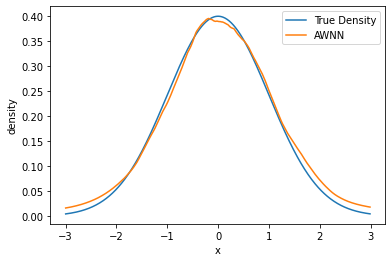

In [176]:
# settings and sampling
dim=1
n_train=2000
distribution=1
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.arange(-3,3,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)







C=0.1
modelAWNN=AWNN(C=C)
_=modelAWNN.fit(X_train)
modelAWNN.max_neighbors_=n_train-1
estDensity=np.exp(modelAWNN.predict(X_test))


# AWNN
plt.plot(np.arange(-3,3,0.01),pdf_X_test,label="True Density")
plt.plot(np.arange(-3,3,0.01),estDensity,label="AWNN")
plt.legend()
plt.xlabel("x")
plt.ylabel("density")


plt.savefig("./plot_result/C_to_smooth_2.pdf".format(distribution,C),bbox_inches="tight")



Text(0.5, 0, 'x')

Text(0, 0.5, 'density')

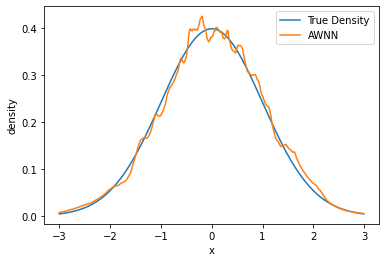

In [177]:
# settings and sampling
dim=1
n_train=2000
distribution=1
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.arange(-3,3,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)







C=0.5
modelAWNN=AWNN(C=C)
_=modelAWNN.fit(X_train)
modelAWNN.max_neighbors_=n_train-1
estDensity=np.exp(modelAWNN.predict(X_test))


# AWNN
plt.plot(np.arange(-3,3,0.01),pdf_X_test,label="True Density")
plt.plot(np.arange(-3,3,0.01),estDensity,label="AWNN")
plt.legend()
plt.xlabel("x")
plt.ylabel("density")


plt.savefig("./plot_result/C_to_smooth_3.pdf".format(distribution,C),bbox_inches="tight")



Text(0.5, 0, 'x')

Text(0, 0.5, 'density')

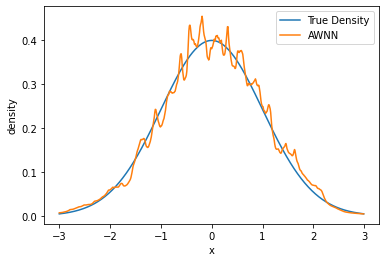

In [178]:
# settings and sampling
dim=1
n_train=2000
distribution=1
np.random.seed(1)
density=TestDistribution(distribution,dim).returnDistribution()
X_train, pdf_X_train = density.generate(n_train)
X_test=np.arange(-3,3,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)







C=1
modelAWNN=AWNN(C=C)
_=modelAWNN.fit(X_train)
modelAWNN.max_neighbors_=n_train-1
estDensity=np.exp(modelAWNN.predict(X_test))


# AWNN
plt.plot(np.arange(-3,3,0.01),pdf_X_test,label="True Density")
plt.plot(np.arange(-3,3,0.01),estDensity,label="AWNN")
plt.legend()
plt.xlabel("x")
plt.ylabel("density")


plt.savefig("./plot_result/C_to_smooth_4.pdf".format(distribution,C),bbox_inches="tight")



## Illustrative Weights

In [201]:
def weight_selection(beta,cut_off=1):
    potentialNeighbors=len(beta)
    alphaIndexMax=0
    lamda = beta[0]+1 
    Sum_beta = 0
    Sum_beta_square = 0

    # iterates for k
    
    while ( lamda>beta[alphaIndexMax] ) and (alphaIndexMax<potentialNeighbors):
        # update max index
        alphaIndexMax +=1
        # updata sum beta and sum beta square
        Sum_beta += beta[alphaIndexMax-1]
        Sum_beta_square += (beta[alphaIndexMax-1])**2
        
        # calculate lambda
        
        if  alphaIndexMax  + (Sum_beta**2 - alphaIndexMax * Sum_beta_square)>=0:
                
            
            lamda = (1/alphaIndexMax) * ( Sum_beta + math.sqrt( alphaIndexMax  + (Sum_beta**2 - alphaIndexMax * Sum_beta_square) ) )
            
        else:
            alphaIndexMax-=1
            break
    
    # estimation
    estAlpha=np.zeros(potentialNeighbors)

    
    if alphaIndexMax<cut_off:
        estAlpha[cut_off-1]=1
        return estAlpha,cut_off
    
    
    for j in range(alphaIndexMax):
        estAlpha[j]=lamda-beta[j]
    
    
    estAlpha=estAlpha/np.linalg.norm(estAlpha,ord=1)
    
    return estAlpha,alphaIndexMax



def get_weights(X_train,X_test,C):
    tree = KDTree(X_train)

    distance_vec,_=tree.query(X_test.reshape(1,-1),X_train.shape[0])
    distance_vec=distance_vec[0]
    
    beta=C*distance_vec
    return weight_selection(beta)

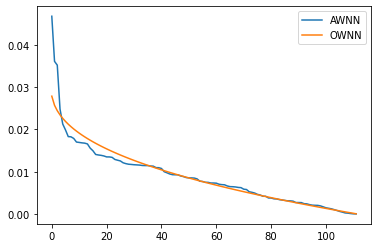

In [273]:
dim=5
distribution_index=2
density=TestDistribution(distribution_index,dim).returnDistribution()
np.random.seed(1)
n_train = 2000
C={"2":0.1,"5":0.3,"8":1.5}
X_train, pdf_X_train = density.generate(n_train)

X_test=np.zeros(dim).reshape(1,-1)

AWNN_weights, idx_max=get_weights(X_train,X_test,C["{}".format(dim)])


k=idx_max

OWNN_weights=np.array([1/k*(1+dim/2-dim/2/k**(2/dim)*(i**(1+2/dim)-(i-1)**(1+2/dim))) for i in range(1,k+1)])

plt.plot(AWNN_weights[:idx_max],label="AWNN")
plt.plot(OWNN_weights[:idx_max],label="OWNN")
plt.legend()

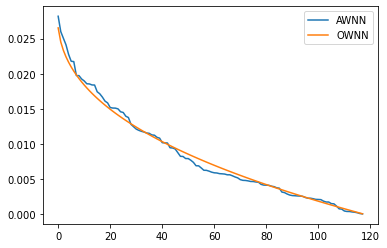

In [280]:
dim=5
distribution_index=2
density=TestDistribution(distribution_index,dim).returnDistribution()
np.random.seed(1)
n_train = 2000
C={"2":0.3,"5":0.6,"8":1.5}
X_train, pdf_X_train = density.generate(n_train)

X_test=np.ones(dim).reshape(1,-1)

AWNN_weights, idx_max=get_weights(X_train,X_test,C["{}".format(dim)])


k=idx_max

OWNN_weights=np.array([1/k*(1+dim/2-dim/2/k**(2/dim)*(i**(1+2/dim)-(i-1)**(1+2/dim))) for i in range(1,k+1)])

plt.plot(AWNN_weights[:idx_max],label="AWNN")
plt.plot(OWNN_weights[:idx_max],label="OWNN")
plt.legend()

## Bias Analysis

Text(0.5, 0, 'x')

Text(0, 0.5, 'density')

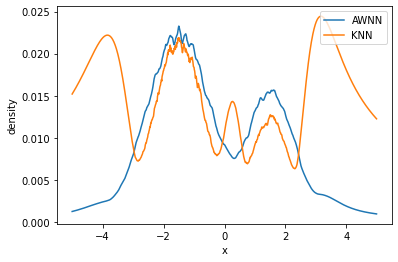

In [85]:
# settings and sampling
dim=1
n_train=2000
distribution=17

range_l,range_u=-5,5

density=TestDistribution(distribution,dim).returnDistribution()

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
m=1000
for s in range(m):
    #print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    

    model_AWNN=AWNN(C=0.6).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=150).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)
    


# AWNN
plt.plot(np.arange(range_l,range_u,0.01),estDensity_AWNN/m,label="AWNN")
plt.xlabel("x")
# KNN
plt.plot(np.arange(range_l,range_u,0.01),estDensity_KNN/m,label="KNN")
plt.legend(loc=1)
plt.ylabel("density")

plt.savefig("./plot_result/analysis_bias.pdf".format(distribution,C),bbox_inches="tight")



Text(0.5, 0, 'x')

Text(0, 0.5, 'Pointwise Error')

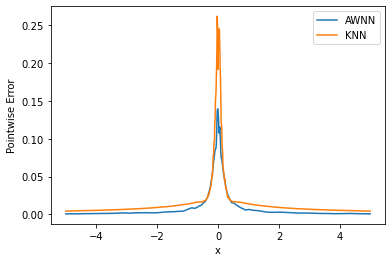

In [89]:
# settings and sampling
dim=1
n_train=2000
distribution=12

range_l,range_u=-5,5

density=TestDistribution(distribution,dim).returnDistribution()

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
m=100
for s in range(m):
    #print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    
    parameters={"C":[i for i in np.logspace(-2,5,15)]}
    cv_model_AWNN=GridSearchCV(estimator=AWNN(),param_grid=parameters,n_jobs=10,cv=10)
    _=cv_model_AWNN.fit(X_train)
    model_AWNN=cv_model_AWNN.best_estimator_
    model_AWNN.C
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    parameters={"k":[int(i*n_train) for i in np.logspace(-2.5,np.log(2/3)/np.log(10),15)]}
    cv_model_KNN=GridSearchCV(estimator=KNN(),param_grid=parameters,n_jobs=-1,cv=10)
    _=cv_model_KNN.fit(X_train,method="KNN")
    model_KNN=cv_model_KNN.best_estimator_
    model_KNN.k
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)
    



# AWNN
plt.plot(np.arange(range_l,range_u,0.01),estDensity_AWNN/m,label="AWNN")
plt.xlabel("x")
# KNN
plt.plot(np.arange(range_l,range_u,0.01),estDensity_KNN/m,label="KNN")
plt.legend(loc=0)
plt.ylabel("Pointwise Error")



Text(0.5, 0, 'x')

Text(0, 0.5, 'Pointwise Error')

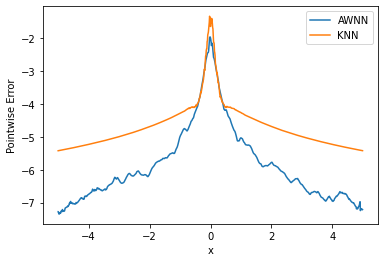

In [90]:
# AWNN
plt.plot(np.arange(range_l,range_u,0.01),np.log(estDensity_AWNN/m),label="AWNN")
plt.xlabel("x")
# KNN
plt.plot(np.arange(range_l,range_u,0.01),np.log(estDensity_KNN/m),label="KNN")
plt.legend(loc=0)
plt.ylabel("Pointwise Error")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Text(0.5, 0, 'x')

Text(0, 0.5, 'Pointwise Error')

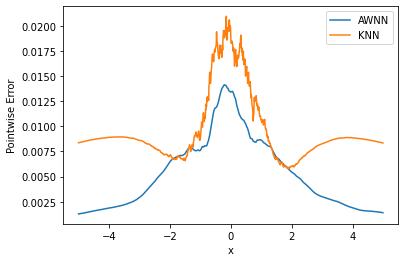

In [99]:
from distributions import TDistribution

# settings and sampling
dim=1
n_train=2000


range_l,range_u=-5,5

density=TDistribution(loc=np.zeros(dim),scale=np.ones(dim),df=2)

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
m=100
for s in range(m):
    print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    
    model_AWNN=AWNN(C=0.1).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=197).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)


# AWNN
plt.plot(np.arange(range_l,range_u,0.01),estDensity_AWNN/m,label="AWNN")
plt.xlabel("x")
# KNN
plt.plot(np.arange(range_l,range_u,0.01),estDensity_KNN/m,label="KNN")
plt.legend(loc=0)
plt.ylabel("Pointwise Error")



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Text(0.5, 0, 'x')

Text(0, 0.5, 'Pointwise Error')

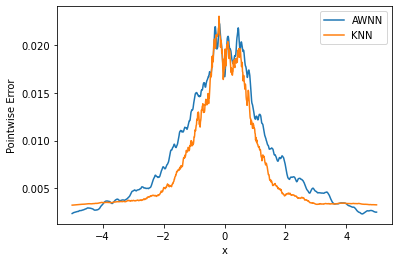

In [97]:
from distributions import CauchyDistribution

# settings and sampling
dim=1
n_train=2000
distribution=12

range_l,range_u=-5,5

density=CauchyDistribution(loc=np.zeros(dim),scale=np.ones(dim))

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
m=100
for s in range(m):
    print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)

    model_AWNN=AWNN(C=0.5).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=150).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)


# AWNN
plt.plot(np.arange(range_l,range_u,0.01),estDensity_AWNN/m,label="AWNN")
plt.xlabel("x")
# KNN
plt.plot(np.arange(range_l,range_u,0.01),estDensity_KNN/m,label="KNN")
plt.legend(loc=0)
plt.ylabel("Pointwise Error")



### New plot method

In [19]:
# settings and sampling
dim=1
n_train=2000
distribution=17

range_l,range_u=-6,6

density=TestDistribution(distribution,dim).returnDistribution()

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
estDensity_WKNN=np.zeros(pdf_X_test.shape)
m=1000
for s in range(m):
    #print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    

    model_AWNN=AWNN(C=0.6).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=150).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)
    
    model_WKNN=KNN(k=150).fit(X_train,method="WKNN")
    estDensity_WKNN+=np.abs(np.exp(model_WKNN.predict(X_test))-pdf_X_test)
    
pointwise_KNN=estDensity_KNN/m
pointwise_WKNN=estDensity_WKNN/m
pointwise_AWNN=estDensity_AWNN/m

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12


12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12


12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

'\n# pointwise error line    \nfig, ax1 = plt.subplots()\nline1, = ax1.plot(X_test, pdf_X_test,color = sns.xkcd_rgb["medium green"],linestyle = \'-\',label = \'density\')\n\n# population density \nax2 = ax1.twinx()\nline2, = ax2.plot(X_test, pointwise_KNN,color = sns.xkcd_rgb["denim blue"],linestyle = \'-\',label = \'KNN\')\nline3, = ax2.plot(X_test, pointwise_AWNN,color = sns.xkcd_rgb["pale red"],linestyle = \'-\',label = \'AWNN\')\n\n\n# axis setting\nax1.set_xlim([range_l,range_u])\ninterval_l,interval_u=pdf_X_test.min(),pdf_X_test.max()\nax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))\n\ninterval_l,interval_u=pointwise_AWNN.min(),pointwise_KNN.max()\nax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.3*(interval_u-interval_l))\n\nax1.set_xlabel("x",fontsize = 12)\nax1.set_ylabel("density",fontsize = 12)\nax2.set_ylabel("pointwise error",fontsize = 12)\nax1.yaxis.set_major_formatter(mtick.FormatStrFormatter(\'%.2f\'))\nax2

Text(0.5, 0, 'x')

Text(0, 0.5, 'true density')

Text(0, 0.5, 'pointwise error')

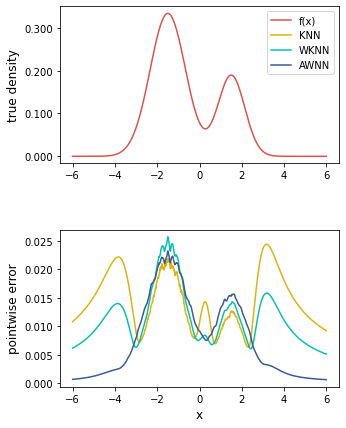

In [20]:
# generate screen
fig = plt.figure(figsize=(5,7))
ax=[]
ax.append(plt.subplot2grid((31,1), (0, 0), rowspan=13))
ax.append(plt.subplot2grid((31,1), (18, 0), rowspan=13))
plt.subplots_adjust(wspace=1,hspace=0.5)


# plot lines
line1, = ax[0].plot(X_test,pdf_X_test,color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax[1].plot(X_test,pointwise_KNN,color = sns.xkcd_rgb["gold"],linestyle = '-',label = 'KNN')
line3, = ax[1].plot(X_test,pointwise_WKNN,color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')
line4, = ax[1].plot(X_test,pointwise_AWNN,color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'AWNN')

# set legend and grid
ax[0].legend(handles = [line1,line2,line3,line4],)

'''
# pointwise error line    
fig, ax1 = plt.subplots()
line1, = ax1.plot(X_test, pdf_X_test,color = sns.xkcd_rgb["medium green"],linestyle = '-',label = 'density')

# population density 
ax2 = ax1.twinx()
line2, = ax2.plot(X_test, pointwise_KNN,color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'KNN')
line3, = ax2.plot(X_test, pointwise_AWNN,color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'AWNN')


# axis setting
ax1.set_xlim([range_l,range_u])
interval_l,interval_u=pdf_X_test.min(),pdf_X_test.max()
ax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

interval_l,interval_u=pointwise_AWNN.min(),pointwise_KNN.max()
ax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.3*(interval_u-interval_l))

ax1.set_xlabel("x",fontsize = 12)
ax1.set_ylabel("density",fontsize = 12)
ax2.set_ylabel("pointwise error",fontsize = 12)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))
'''
ax[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax[1].set_xlabel("x",fontsize = 12)
ax[0].set_ylabel("true density",fontsize = 12)
ax[1].set_ylabel("pointwise error",fontsize = 12)
plt.savefig("./plot_result/bias_analysis_1.pdf".format(dim),bbox_inches="tight",dpi=600)



In [13]:
# settings and sampling
dim=1
n_train=2000
distribution=12

range_l,range_u=-1.,1.

density=TestDistribution(distribution,dim).returnDistribution()

X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
pdf_X_test=density.density(X_test)

estDensity_KNN=np.zeros(pdf_X_test.shape)
estDensity_AWNN=np.zeros(pdf_X_test.shape)
estDensity_WKNN=np.zeros(pdf_X_test.shape)
m=1000
for s in range(m):
    #print(s)
    np.random.seed(s)
    X_train, pdf_X_train = density.generate(n_train)
    

    model_AWNN=AWNN(C=1.2).fit(X_train)
    estDensity_AWNN+=np.abs(np.exp(model_AWNN.predict(X_test))-pdf_X_test)


    
    model_KNN=KNN(k=200).fit(X_train,method="KNN")
    estDensity_KNN+=np.abs(np.exp(model_KNN.predict(X_test))-pdf_X_test)
    
    model_WKNN=KNN(k=200).fit(X_train,method="WKNN")
    estDensity_WKNN+=np.abs(np.exp(model_WKNN.predict(X_test))-pdf_X_test)
    
pointwise_KNN=estDensity_KNN/m
pointwise_WKNN=estDensity_WKNN/m
pointwise_AWNN=estDensity_AWNN/m

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

'\n# pointwise error line    \nfig, ax1 = plt.subplots()\nline1, = ax1.plot(X_test, pdf_X_test,color = sns.xkcd_rgb["medium green"],linestyle = \'-\',label = \'density\')\n\n# population density \nax2 = ax1.twinx()\nline2, = ax2.plot(X_test, pointwise_KNN,color = sns.xkcd_rgb["denim blue"],linestyle = \'-\',label = \'KNN\')\nline3, = ax2.plot(X_test, pointwise_AWNN,color = sns.xkcd_rgb["pale red"],linestyle = \'-\',label = \'AWNN\')\n\n\n# axis setting\nax1.set_xlim([range_l,range_u])\ninterval_l,interval_u=pdf_X_test.min(),pdf_X_test.max()\nax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))\n\ninterval_l,interval_u=pointwise_AWNN.min(),pointwise_KNN.max()\nax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.3*(interval_u-interval_l))\n\nax1.set_xlabel("x",fontsize = 12)\nax1.set_ylabel("density",fontsize = 12)\nax2.set_ylabel("pointwise error",fontsize = 12)\nax1.yaxis.set_major_formatter(mtick.FormatStrFormatter(\'%.2f\'))\nax2

Text(0.5, 0, 'x')

Text(0, 0.5, 'true density')

Text(0, 0.5, 'pointwise error')

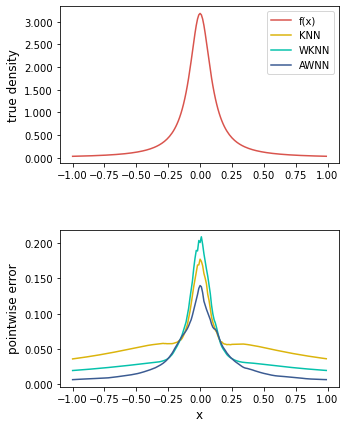

In [18]:
# generate screen
fig = plt.figure(figsize=(5,7))
ax=[]
ax.append(plt.subplot2grid((31,1), (0, 0), rowspan=13))
ax.append(plt.subplot2grid((31,1), (18, 0), rowspan=13))
plt.subplots_adjust(wspace=1,hspace=0.5)


# plot lines
line1, = ax[0].plot(X_test,pdf_X_test,color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax[1].plot(X_test,pointwise_KNN,color = sns.xkcd_rgb["gold"],linestyle = '-',label = 'KNN')
line3, = ax[1].plot(X_test,pointwise_WKNN,color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'WKNN')
line4, = ax[1].plot(X_test,pointwise_AWNN,color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'AWNN')

# set legend and grid
ax[0].legend(handles = [line1,line2,line3,line4],)

'''
# pointwise error line    
fig, ax1 = plt.subplots()
line1, = ax1.plot(X_test, pdf_X_test,color = sns.xkcd_rgb["medium green"],linestyle = '-',label = 'density')

# population density 
ax2 = ax1.twinx()
line2, = ax2.plot(X_test, pointwise_KNN,color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'KNN')
line3, = ax2.plot(X_test, pointwise_AWNN,color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'AWNN')


# axis setting
ax1.set_xlim([range_l,range_u])
interval_l,interval_u=pdf_X_test.min(),pdf_X_test.max()
ax1.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.05*(interval_u-interval_l))

interval_l,interval_u=pointwise_AWNN.min(),pointwise_KNN.max()
ax2.set_ylim(interval_l-0.05*(interval_u-interval_l),interval_u+0.3*(interval_u-interval_l))

ax1.set_xlabel("x",fontsize = 12)
ax1.set_ylabel("density",fontsize = 12)
ax2.set_ylabel("pointwise error",fontsize = 12)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))
'''
ax[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax[1].set_xlabel("x",fontsize = 12)
ax[0].set_ylabel("true density",fontsize = 12)
ax[1].set_ylabel("pointwise error",fontsize = 12)
plt.savefig("./plot_result/bias_analysis_2.pdf".format(dim),bbox_inches="tight",dpi=600)



## Time Consumption

In [281]:
dim=5
n_train_vec=[ i*100000 for i in range(1,11)]
n_test=1000
distribution=2

density=TestDistribution(distribution,dim).returnDistribution()

time_matrix=[]

for seed in range(10):
    
    np.random.seed(seed)
    time_vec=[0]

    for n_train_idx,n_train in enumerate(n_train_vec):
        #if n_train<600000:
        C=0.5+0.01*n_train_idx**2
        #else:
        #    C=1000
        print(C)
        print(time_vec)

        X_train, pdf_X_train = density.generate(n_train)
        X_test, pdf_X_test = density.generate(n_test)


        model=AWNN(C=C,cut_off=1)

        _=model.fit(X_train,max_neighbors=int(2000+1000*n_train_idx**(1/5)))
        time_start=time()
        _=model.predict(X_test)

        time_end=time()
        time_vec.append(time_end-time_start)
    time_matrix.append(time_vec)
    


0.5
[0]
1340
269
927
357
356
280
1203
227
275
144
272
297
189
649
1064
698
840
1246
500
237
0.51
[0, 0.9587137699127197]
203
217
1174
1104
1328
340
358
1147
1468
652
1379
854
1589
760
476
737
221
831
404
420
0.54
[0, 0.9587137699127197, 1.3315787315368652]
282
228
743
358
1163
159
308
963
517
1454
372
355
142
382
594
989
1017
271
519
1417
0.59
[0, 0.9587137699127197, 1.3315787315368652, 1.4985954761505127]
1383
445
654
1430
1240
307
176
397
260
319
282
381
409
138
850
274
754
563
450
919
0.66
[0, 0.9587137699127197, 1.3315787315368652, 1.4985954761505127, 1.632246971130371]
414
271
477
403
695
1135
554
204
770
572
1176
272
951
300
1217
240
1368
1250
1364
1026
0.75
[0, 0.9587137699127197, 1.3315787315368652, 1.4985954761505127, 1.632246971130371, 1.8138184547424316]
133
300
232
235
372
222
279
562
299
773
449
357
360
153
251
323
144
682
256
1079
0.86
[0, 0.9587137699127197, 1.3315787315368652, 1.4985954761505127, 1.632246971130371, 1.8138184547424316, 1.9850482940673828]
178
175
748
936

171
128
127
170
584
254
263
669
1240
105
329
219
656
278
980
1110
194
227
128
248
0.99
[0, 0.9537816047668457, 1.322542428970337, 1.4951868057250977, 1.627885103225708, 1.83076810836792, 1.9761526584625244, 2.161057472229004]
335
242
191
1007
206
560
198
830
144
659
186
171
231
653
155
239
472
267
430
277
1.1400000000000001
[0, 0.9537816047668457, 1.322542428970337, 1.4951868057250977, 1.627885103225708, 1.83076810836792, 1.9761526584625244, 2.161057472229004, 2.193267583847046]
336
274
439
103
693
166
289
232
161
79
152
87
565
245
527
298
183
479
637
106
1.31
[0, 0.9537816047668457, 1.322542428970337, 1.4951868057250977, 1.627885103225708, 1.83076810836792, 1.9761526584625244, 2.161057472229004, 2.193267583847046, 2.4638731479644775]
464
468
111
768
308
126
687
299
217
73
215
145
495
222
135
123
107
64
202
145
0.5
[0]
970
163
261
1090
912
299
218
340
641
812
592
975
343
312
1148
929
144
291
1127
732
0.51
[0, 0.9479143619537354]
207
1024
333
367
919
468
381
216
180
170
1152
266
1375
41

0.54
[0, 0.9459729194641113, 1.3335621356964111]
267
223
217
460
422
923
146
988
520
716
343
484
492
690
356
596
1629
272
429
390
0.59
[0, 0.9459729194641113, 1.3335621356964111, 1.4864506721496582]
642
278
263
1064
1545
247
1632
964
161
1641
476
1189
291
1330
422
315
537
336
1214
274
0.66
[0, 0.9459729194641113, 1.3335621356964111, 1.4864506721496582, 1.626016616821289]
979
272
256
1101
946
998
1191
649
346
847
401
283
839
1144
329
221
1115
522
993
1019
0.75
[0, 0.9459729194641113, 1.3335621356964111, 1.4864506721496582, 1.626016616821289, 1.8204646110534668]
213
282
238
391
169
310
1420
536
974
969
411
243
281
816
1410
751
368
1311
249
337
0.86
[0, 0.9459729194641113, 1.3335621356964111, 1.4864506721496582, 1.626016616821289, 1.8204646110534668, 1.9879088401794434]
199
284
258
289
251
150
934
262
256
95
655
1214
1029
348
1064
145
247
837
987
225
0.99
[0, 0.9459729194641113, 1.3335621356964111, 1.4864506721496582, 1.626016616821289, 1.8204646110534668, 1.9879088401794434, 2.2047507762

Text(0.5, 0, 'size of datasets (100k)')

Text(0, 0.5, 'time (s)')

(0.0, 11.0)

(0.0, 3.0102363348007204)

Text(0.5, 1.450933814048767, '(1,1.0)')

Text(1.5, 1.6337382555007935, '(2,1.3)')

Text(4.5, 2.12170147895813, '(5,1.8)')

Text(9.2, 2.7102363348007206, '(10,2.5)')

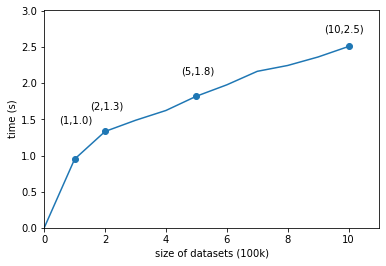

In [289]:
time_vec=np.array(time_matrix).mean(axis=0)
plt.plot(np.arange(len(time_vec)),time_vec)
plt.scatter([1,2,5,10],[time_vec[1],time_vec[2],time_vec[5],time_vec[10]])
plt.xlabel("size of datasets (100k)")
plt.ylabel("time (s)")
plt.xlim(0,11)
plt.ylim(0,max(time_vec)+0.5)
plt.annotate("(1,{:.1f})".format(time_vec[1]), xy = (1,time_vec[0]), xytext = (1-0.5,time_vec[1]+0.5))
plt.annotate("(2,{:.1f})".format(time_vec[2]), xy = (2,time_vec[1]), xytext = (2-0.5,time_vec[2]+0.3))
plt.annotate("(5,{:.1f})".format(time_vec[5]), xy = (5,time_vec[4]), xytext = (5-0.5,time_vec[5]+0.3))
plt.annotate("(10,{:.1f})".format(time_vec[10]), xy = (10,time_vec[9]), xytext = (10-0.8,time_vec[10]+0.2))
plt.savefig("./plot_result/scalability.pdf".format(dim),bbox_inches="tight")


In [284]:
np.array(time_matrix).mean(axis=0)

array([0.        , 0.95093381, 1.33373826, 1.48829057, 1.62429075,
       1.82170148, 1.97934871, 2.16620855, 2.24724271, 2.36500914,
       2.51023633])